In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-modelling/Churn_Modelling.csv


In [2]:
df=pd.read_csv("/kaggle/input/churn-modelling/Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [8]:
#dropping out unwanted columns
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.shape

(10000, 11)

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [12]:
df['Geography']=encoder.fit_transform(df['Geography'])
df['Gender']=encoder.fit_transform(df['Gender'])

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4991,493,0,0,33,8,90791.69,1,1,1,59659.53,0
2144,634,2,1,34,1,0.00,2,1,0,61995.57,0
7583,682,0,1,26,8,0.00,2,1,0,178373.43,0
7842,734,0,1,43,7,107805.67,1,0,0,182505.68,0
250,771,1,0,36,5,77846.90,1,0,0,99805.99,0


In [15]:
df = pd.get_dummies(df,columns=['Geography'],drop_first=True)

In [16]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [17]:
X=df.drop(columns=['Exited'],axis=1).values
y=df['Exited'].values

In [18]:
X

array([[6.1900000e+02, 0.0000000e+00, 4.2000000e+01, ..., 1.0134888e+05,
        0.0000000e+00, 0.0000000e+00],
       [6.0800000e+02, 0.0000000e+00, 4.1000000e+01, ..., 1.1254258e+05,
        0.0000000e+00, 1.0000000e+00],
       [5.0200000e+02, 0.0000000e+00, 4.2000000e+01, ..., 1.1393157e+05,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [7.0900000e+02, 0.0000000e+00, 3.6000000e+01, ..., 4.2085580e+04,
        0.0000000e+00, 0.0000000e+00],
       [7.7200000e+02, 1.0000000e+00, 4.2000000e+01, ..., 9.2888520e+04,
        1.0000000e+00, 0.0000000e+00],
       [7.9200000e+02, 0.0000000e+00, 2.8000000e+01, ..., 3.8190780e+04,
        0.0000000e+00, 0.0000000e+00]])

In [19]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [21]:
X=scaler.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state = 0)

In [23]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [24]:
model=Sequential()

In [25]:
model.add(Dense(11,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 12        
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
history=model.fit(X_train,y_train,epochs=50,verbose=1,validation_split=0.2)

Epoch 1/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4970 - accuracy: 0.7955 - val_loss: 0.4788 - val_accuracy: 0.7969
Epoch 2/50
200/200 [==============================] - 0s 1ms/step - loss: 0.4585 - accuracy: 0.7958 - val_loss: 0.4576 - val_accuracy: 0.7969
Epoch 3/50
200/200 [==============================] - 0s 1ms/step - loss: 0.4409 - accuracy: 0.7969 - val_loss: 0.4448 - val_accuracy: 0.8031
Epoch 4/50
200/200 [==============================] - 0s 1ms/step - loss: 0.4289 - accuracy: 0.8056 - val_loss: 0.4354 - val_accuracy: 0.8087
Epoch 5/50
200/200 [==============================] - 0s 1ms/step - loss: 0.4192 - accuracy: 0.8169 - val_loss: 0.4260 - val_accuracy: 0.8181
Epoch 6/50
200/200 [==============================] - 0s 1ms/step - loss: 0.4092 - accuracy: 0.8234 - val_loss: 0.4176 - val_accuracy: 0.8238
Epoch 7/50
200/200 [==============================] - 0s 1ms/step - loss: 0.3994 - accuracy: 0.8311 - val_loss: 0.4085 - val_accuracy: 0.8263
Epoch 

In [29]:
 y_pred=model.predict_classes(X_test)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.86

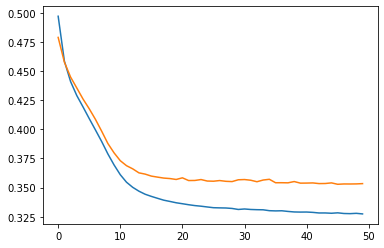

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

**We can't say that it is overfitting, as the accuracy is 85.8% and our val_loss is slightly higher than loss function.**

In [32]:
history.history

{'loss': [0.496989369392395,
  0.4585264325141907,
  0.4409274756908417,
  0.4289126992225647,
  0.4191846549510956,
  0.40917980670928955,
  0.3994312286376953,
  0.38951900601387024,
  0.37886160612106323,
  0.36938560009002686,
  0.3610151708126068,
  0.35457974672317505,
  0.35019516944885254,
  0.3468744158744812,
  0.3442550599575043,
  0.3424150347709656,
  0.340757817029953,
  0.33915209770202637,
  0.33806702494621277,
  0.33693331480026245,
  0.336110919713974,
  0.33525416254997253,
  0.3345179259777069,
  0.333990216255188,
  0.33333373069763184,
  0.33270329236984253,
  0.3325563669204712,
  0.3324506878852844,
  0.3320583999156952,
  0.3311960697174072,
  0.33160796761512756,
  0.33117976784706116,
  0.33099597692489624,
  0.33090028166770935,
  0.3301432430744171,
  0.32995712757110596,
  0.3300666809082031,
  0.3295041024684906,
  0.3290533125400543,
  0.3289415240287781,
  0.3289826214313507,
  0.3286830186843872,
  0.3281804323196411,
  0.3281969428062439,
  0.3279322

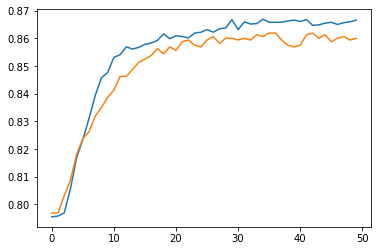

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])